Code reference for circular bar plots : https://python-graph-gallery.com/circular-barplot/ 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from functools import reduce
# color1 = ["#a6cee3"]*3 + ["#e31a1c"]*2 + ["#b2df8a"]*6 + ["#fdbf6f"]*3 + ["#cab2d6"]*6 


In [3]:
df_res = pd.read_table('means.dat',sep='\t',header=None)
df_res

,0,1
0,LYS,0.177083
1,ARG,0.056542
2,HIS,0.052458
3,ASP,0.111667
4,GLU,0.148208
5,SER,0.190417
6,THR,0.195500
7,CYS,0.068625
8,PRO,0.227000
9,ASN,0.053167


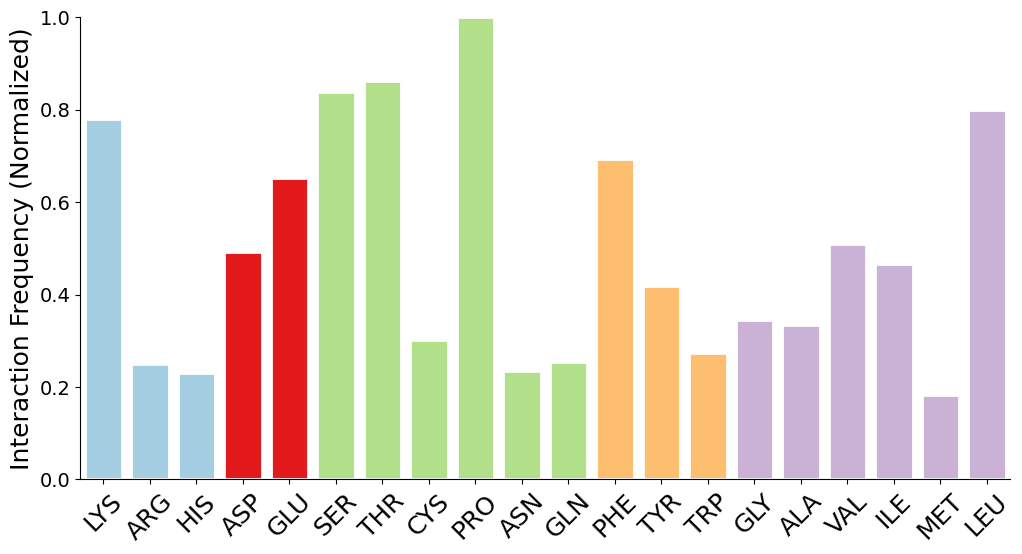

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# set figure size
plt.figure(figsize=(12, 6))

color1 = ["#a6cee3"]*3 + ["#e31a1c"]*2 + ["#b2df8a"]*6 + ["#fdbf6f"]*3 + ["#cab2d6"]*6 

# Normalize heights
max_height = df_res[1].max()
normalized_heights = df_res[1] / max_height

# Draw bars
bars = plt.bar(
    x=df_res[0],  # x-axis values (labels)
    height=normalized_heights,  # normalized heights
    color=color1,
    edgecolor="white",
    linewidth=2,
    alpha=1)

# Customize the plot
# plt.xlabel('Labels', fontsize=14)
plt.ylabel('Interaction Frequency (Normalized)', fontsize=18)
plt.xticks(rotation=45, ha='center',fontsize=18)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=14)

# Remove the right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.ylim([0,1])

plt.xlim([-0.5,19.5])

# Save the plot
plt.savefig('Fig1d_Dani_45.png', dpi=500, bbox_inches='tight')
plt.savefig('Fig1d_Dani_45.pdf')

# Show the plot
plt.show()


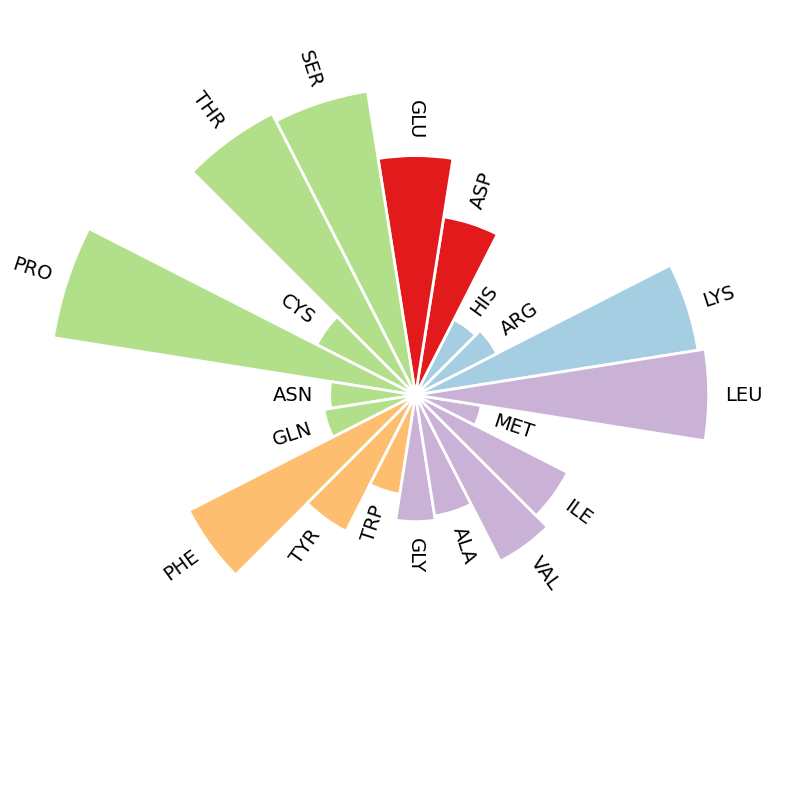

In [16]:
#use line below to see where most of your data is; as long as most of it is near zero it is okay to avg over residues i guess
# df_ordered_select.plot.hist(y='mean',style='.-')

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_res[1].max()

color1 = ["#a6cee3"]*3 + ["#e31a1c"]*2 + ["#b2df8a"]*6 + ["#fdbf6f"]*3 + ["#cab2d6"]*6 

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_res[1] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_res[1].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_res[1].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.01

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_res[0]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        size=14,
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('mean_sri.png',dpi=330)